In [29]:
from keras.applications.vgg19 import VGG19
#Carrega o modelo ja treinado
model = VGG19()
#Imprime os dados do modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [30]:
#Importa as bibliotecas para plotar os filtros
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
j = -1
for i in model.layers:
    print(j, ' ', i.name)
    j+=1

-1   input_2
0   block1_conv1
1   block1_conv2
2   block1_pool
3   block2_conv1
4   block2_conv2
5   block2_pool
6   block3_conv1
7   block3_conv2
8   block3_conv3
9   block3_conv4
10   block3_pool
11   block4_conv1
12   block4_conv2
13   block4_conv3
14   block4_conv4
15   block4_pool
16   block5_conv1
17   block5_conv2
18   block5_conv3
19   block5_conv4
20   block5_pool
21   flatten
22   fc1
23   fc2
24   predictions


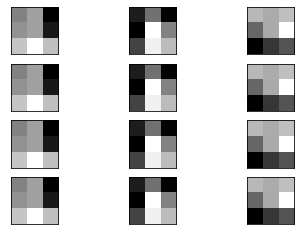

In [31]:
#Cria um dicionário com o nome da camada e a camada
layer_dict = dict([(layer.name, layer) for layer in model.layers])
#Define quual camada será plotada
layer_name = 'block5_conv4'
#Qual filtro da camda será viazualizado
filter_index = 1
#Pega os filtros(pesos) e as bias daquela camada
filters, biases = layer_dict[layer_name].get_weights()
#Normaliza para poderem ser plotados
f_min, f_max = np.amin(filters), np.amax(filters)
filters = (filters - f_min) / (f_max - f_min)
# Plot first few filters
n_filters, index = 4, 1
for i in range(n_filters):
    f = filters[:, :, :, 1]
# Plot each channel separately
    for j in range(3):
        ax = plt.subplot(n_filters, 3, index)
        ax.set_xticks([])
        ax.set_yticks([])        
        plt.imshow(f[:, :, j], cmap='gray')
        index += 1
        
plt.show()

In [32]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('images/'+'pneu.jpeg', target_size=(224, 224))

In [33]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [34]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [35]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [36]:
# predict the probability across all output classes
yhat = model.predict(image)

In [37]:
from keras.applications.vgg19 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
for i in range(5):
    labelk = label[0][i]
    # print the classification
    print('%s (%.2f%%)' % (labelk[1], labelk[2]*100))


car_wheel (71.11%)
spotlight (14.41%)
oil_filter (3.40%)
strainer (2.04%)
thimble (1.02%)


In [38]:
layer_outputs = [layer.output for layer in model.layers[1:] ]
# Extracts the outputs of the top 12 layers

In [39]:
from keras import models
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

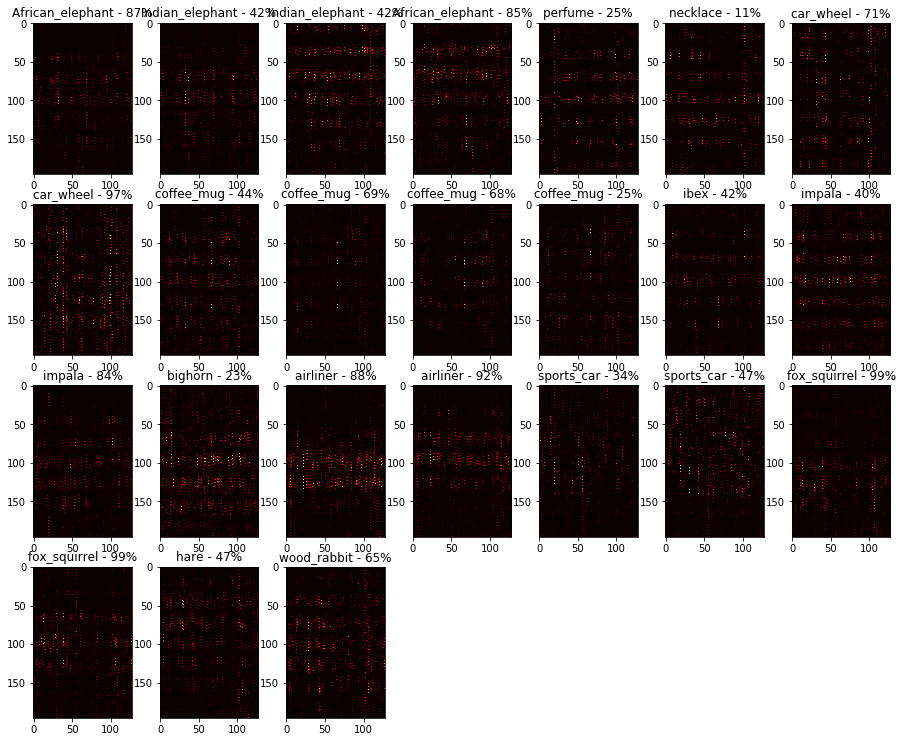

In [40]:
imgs = ('elephant1.jpeg', 'elephant2.jpeg', 'elephant3.jpeg', 'elephant4.jpeg', 
        'plumbus.webp', 'plumbus2.jpeg', 'pneu.jpeg', 'pneu2.jpeg', 
        'caneca1.jpg', 'caneca2.jpeg', 'caneca3.jpg', 'caneca4.jpeg', 
        'deer.jpg', 'deer2.jpeg', 'impala.jpeg', 'deer3.jpeg', 
        'aviao1.jpeg', 'aviao2.jpeg', 'car1.jpeg', 'car2.jpeg', 
       'esquilo1.jpeg', 'esquilo2.jpeg', 'rato1.jpeg', 'rato2.jpeg')
layer = 20
j = 1
patterns = []
tittles = []
for i in imgs:
    img_aux = load_img('images/'+i, target_size=(224, 224))
    img_aux = img_to_array(img_aux)
    img_aux = img_aux.reshape((1, img_aux.shape[0], img_aux.shape[1], img_aux.shape[2]))
    img_aux = preprocess_input(img_aux)
    
    pred_aux = activation_model.predict(img_aux)
    pred_aux = pred_aux[layer]
    f_min, f_max = np.amin(pred_aux), np.amax(pred_aux)
    pred_aux = (pred_aux - f_min) / (f_max - f_min)
    #patterns.append(pred_aux)
    '''
    for i in range(len(pred_aux[0])):
        if(pred_aux[0][i] >= 0.8):
            pred_aux[0][i] = 1
        elif(pred_aux[0][i] >= 0.6):
            pred_aux[0][i] = 0.0
        elif(pred_aux[0][i] >= 0.4):
            pred_aux[0][i] = 0.0
        elif(pred_aux[0][i] >= 0.2):
            pred_aux[0][i] = 0.0
        else:
            pred_aux[0][i] = 0
    #'''
    patterns.append(pred_aux)
    pred_aux = pred_aux.reshape((196,128))
    
    plt.subplot(len(imgs), 7, j)
    plt.imshow(pred_aux, cmap='hot')
    j+=1
    
    yhat = model.predict(img_aux)
    label = decode_predictions(yhat)
    label = label[0][0]
    tittles.append(label[1])
    plt.title(label[1]+' - '+str(int(label[2]*100))+'%')
plt.subplots_adjust(left=0, bottom=0, right=2, top=15, wspace=0.2, hspace=0.2)
plt.show()

In [41]:
for i in range(len(patterns)):
    patterns[i] = patterns[i][0]
len(patterns)

24

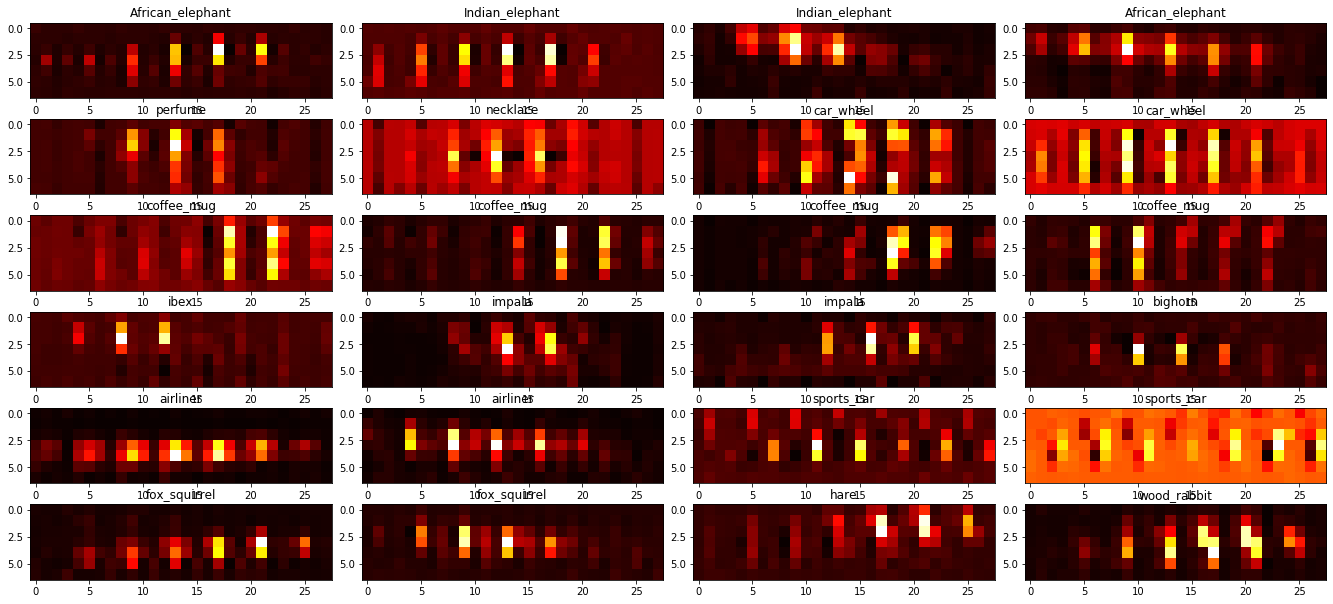

In [42]:
# Import Independent Component Analysis Algorithm
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

RS = 1
num_comp = 1
qual = 1
maps = []

# Initialize the algorithm and set the number of PC's
if (qual == 0) :
    dim_red = FastICA(n_components=num_comp)
elif (qual == 1):
    dim_red = PCA(n_components=num_comp)
elif (qual == 2):
    dim_red = TSNE(random_state=RS)

j=1
i=0
# Fit and transform the model to data. It returns a list of independent components 
for aux in patterns:
    aux = aux.reshape((196, 128))
    aux = dim_red.fit_transform(aux)
    f_min, f_max = np.amin(aux), np.amax(aux)
    aux = (aux - f_min) / (f_max - f_min)
    aux = aux.reshape((1, aux.shape[0]*aux.shape[1]))
    
    '''
    for k in range(len(aux[0])):
        if(aux[0][k] >= 0.85):
            aux[0][k] = 1
        elif(aux[0][k] >= 0.5):
            aux[0][k] = 0.3
        else:
            aux[0][k] = 0
    #'''
    
    aux = aux.reshape((7, 28))
    maps.append(aux)
    
    plt.subplot(len(imgs), 4, j)
    plt.imshow(aux, cmap='hot')
    j+=1
    plt.title(tittles[i])
    i+=1
plt.subplots_adjust(left=0, bottom=0, right=3, top=8, wspace=0.1, hspace=0.1)
plt.show()


In [43]:
'''
RS = 123
num_comp = 7
qual = 2
# Initialize the algorithm and set the number of PC's
if (qual == 0) :
    dim_red = FastICA(n_components=num_comp)
elif (qual == 1):
    dim_red = PCA(n_components=num_comp)
elif (qual == 2):
    dim_red = TSNE(random_state=RS)
j=1
i=0
# Fit and transform the model to data. It returns a list of independent components 
for aux in maps:
    aux = dim_red.fit_transform(aux)
    f_min, f_max = np.amin(aux), np.amax(aux)
    aux = (aux - f_min) / (f_max - f_min)
    aux = aux.reshape((2, 7))
    plt.subplot(len(imgs), 4, j)
    plt.imshow(aux, cmap='hot')
    j+=1
    plt.title(tittles[i])
    i+=1
plt.subplots_adjust(left=0, bottom=0, right=3, top=10, wspace=0.2, hspace=0.2)
plt.show()
'''

"\nRS = 123\nnum_comp = 7\nqual = 2\n# Initialize the algorithm and set the number of PC's\nif (qual == 0) :\n    dim_red = FastICA(n_components=num_comp)\nelif (qual == 1):\n    dim_red = PCA(n_components=num_comp)\nelif (qual == 2):\n    dim_red = TSNE(random_state=RS)\nj=1\ni=0\n# Fit and transform the model to data. It returns a list of independent components \nfor aux in maps:\n    aux = dim_red.fit_transform(aux)\n    f_min, f_max = np.amin(aux), np.amax(aux)\n    aux = (aux - f_min) / (f_max - f_min)\n    aux = aux.reshape((2, 7))\n    plt.subplot(len(imgs), 4, j)\n    plt.imshow(aux, cmap='hot')\n    j+=1\n    plt.title(tittles[i])\n    i+=1\nplt.subplots_adjust(left=0, bottom=0, right=3, top=10, wspace=0.2, hspace=0.2)\nplt.show()\n"

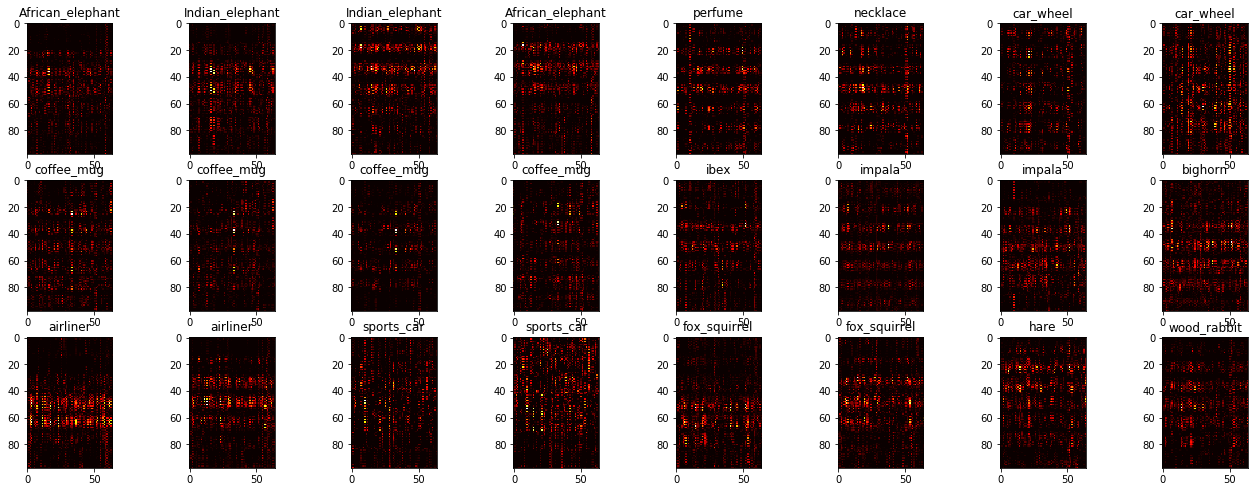

In [44]:
for i in range(len(patterns)):
    patterns[i] = patterns[i].reshape(196, 128)
new =[]
for pat_aux in patterns:
    red_patterns = np.empty((int(pat_aux.shape[0]/2), int(pat_aux.shape[1]/2)))
    l=0
    for i in range(0, pat_aux.shape[0], 2):
        c=0
        for j in range(0, pat_aux.shape[1], 2):
            #red_patterns[l][c] = max(pat_aux[i][j], pat_aux[i+1][j], pat_aux[i][j+1], pat_aux[i+1][j+1])
            red_patterns[l][c] = (pat_aux[i][j] + pat_aux[i+1][j] + pat_aux[i][j+1] + pat_aux[i+1][j+1])/4
            c+=1
        l+=1
    new.append(red_patterns)

j=1
i=0
# Fit and transform the model to data. It returns a list of independent components 
for aux in new:
    f_min, f_max = np.amin(aux), np.amax(aux)
    aux = (aux - f_min) / (f_max - f_min)
    plt.subplot(len(imgs), 8, j)
    plt.imshow(aux, cmap='hot')
    j+=1
    plt.title(tittles[i])
    i+=1
plt.subplots_adjust(left=0, bottom=0, right=3, top=13, wspace=0.01, hspace=0.2)
plt.show()

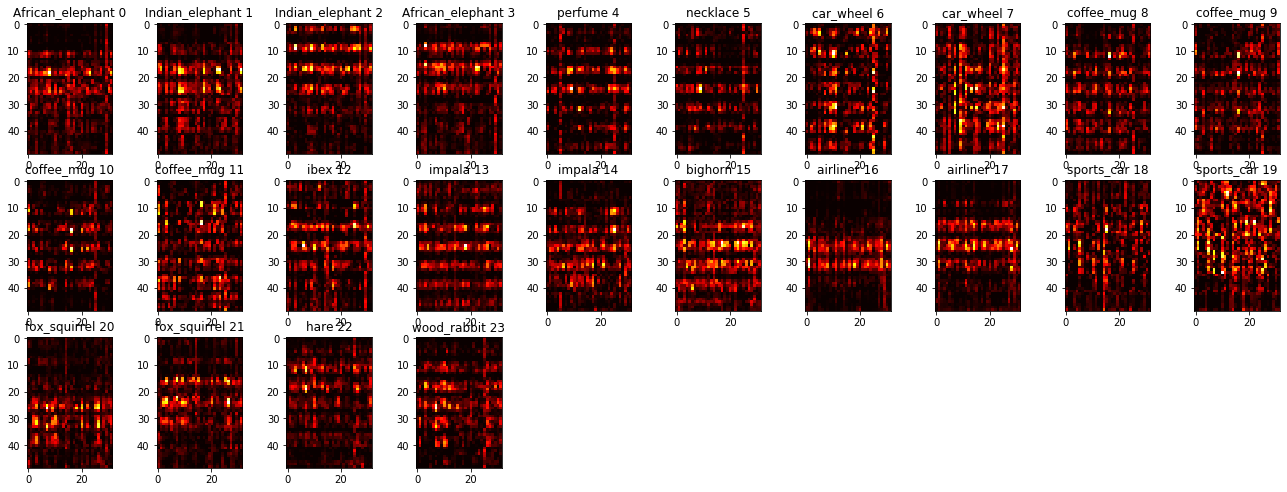

In [45]:
new_2 =[]
for pat_aux in new:
    red_patterns = np.empty((int(pat_aux.shape[0]/2), int(pat_aux.shape[1]/2)))
    l=0
    for i in range(0, pat_aux.shape[0], 2):
        c=0
        for j in range(0, pat_aux.shape[1], 2):
            #red_patterns[l][c] = max(pat_aux[i][j], pat_aux[i+1][j], pat_aux[i][j+1], pat_aux[i+1][j+1])
            red_patterns[l][c] = (pat_aux[i][j] + pat_aux[i+1][j] + pat_aux[i][j+1] + pat_aux[i+1][j+1])/4 
            c+=1
        l+=1
    new_2.append(red_patterns)

j=1
i=0
# Fit and transform the model to data. It returns a list of independent components 
for aux in new_2:
    f_min, f_max = np.amin(aux), np.amax(aux)
    aux = (aux - f_min) / (f_max - f_min)
    plt.subplot(len(imgs), 10, j)
    plt.imshow(aux, cmap='hot')
    j+=1
    plt.title(tittles[i]+' '+str(i))
    i+=1
plt.subplots_adjust(left=0, bottom=0, right=3, top=13, wspace=0.01, hspace=0.2)
plt.show()


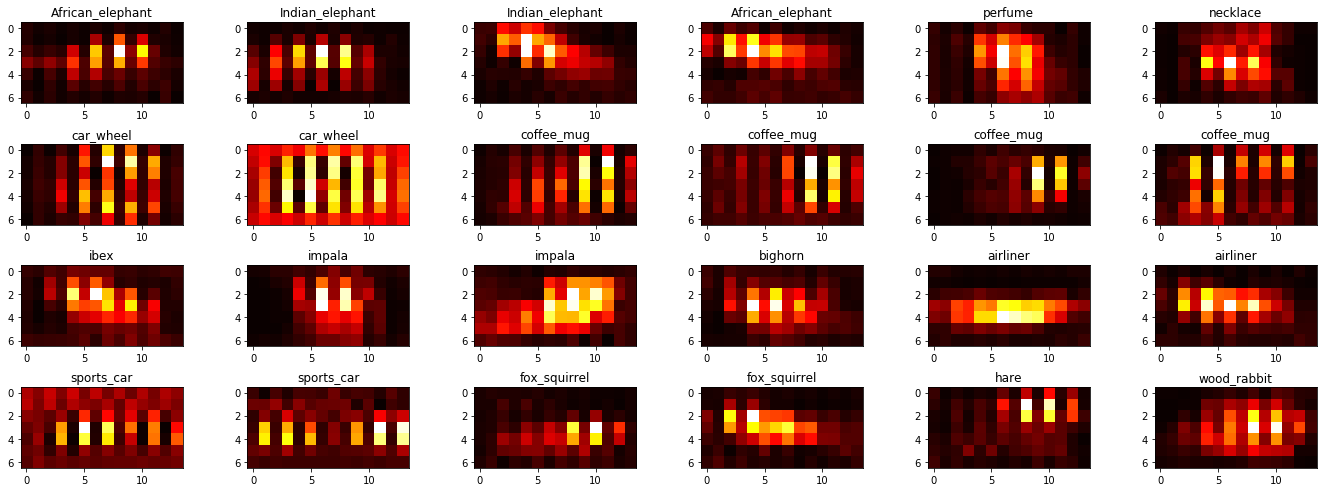

In [46]:
# Import Independent Component Analysis Algorithm
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import SparsePCA as SPCA

RS = 1
num_comp = 1
qual = 1
maps = []

# Initialize the algorithm and set the number of PC's
if (qual == 0) :
    dim_red = FastICA(n_components=num_comp)
elif (qual == 1):
    dim_red = PCA(n_components=num_comp)
elif (qual == 2):
    dim_red = TSNE(random_state=RS)
elif (qual == 3):
    dim_red = SPCA(n_components=num_comp)

j=1
i=0
# Fit and transform the model to data. It returns a list of independent components 
for aux in new:
    aux = dim_red.fit_transform(aux)
    f_min, f_max = np.amin(aux), np.amax(aux)
    aux = (aux - f_min) / (f_max - f_min)
    aux = aux.reshape((1, aux.shape[0]*aux.shape[1]))
    
    aux = aux.reshape((7, 14))
    maps.append(aux)
    
    plt.subplot(len(imgs), 6, j)
    plt.imshow(aux, cmap='hot')
    j+=1
    plt.title(tittles[i])
    i+=1
plt.subplots_adjust(left=0, bottom=0, right=3, top=10, wspace=0.4, hspace=0.4)
plt.show()